In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

What is Boosting?

Boosting improves machine learning performance by sequentially correcting errors and combining weak learners into strong predictors.

How Boosting Works

Boosting transforms weak learners into one unified, strong learner through a systematic process that focuses on reducing errors in sequential model training. The steps involved include:

1. Select Initial Weights: Assign initial weights to all data points to indicate their importance in the learning process.
2. Train Sequentially: Train the first weak learner on the data. After evaluating its performance, increase the weights of misclassified instances. 3. This makes the next weak learner focus more on the harder cases.
3. Iterate the Process: Repeat the process of adjusting weights and training subsequent learners. Each new model focuses on the weaknesses of the ensemble thus far.
4. Combine the Results: Aggregate the predictions of all weak learners to form the final output. The aggregation is typically weighted, where more accurate learners have more influence.

AdaBoost (Adaptive Boosting)

AdaBoost is one of the first boosting algorithms. It focuses on reweighting the training examples each time a learner is added, putting more emphasis on the incorrectly classified instances. AdaBoost is particularly effective for binary classification problems.

In [31]:
df = pd.read_csv('/content/heart (1).csv')

In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Data Description


* **age:**  Represents the age of the patient.  Likely numeric (integer).

* **sex:**  Indicates the gender of the patient. Likely categorical (0 or 1, potentially representing female and male).  Further investigation is needed to confirm the coding scheme.

* **cp:**  Chest pain type. This is a categorical feature, and the specific values and their meanings need to be examined.

* **trestbps:**  Resting blood pressure (in mm Hg on admission to the hospital).  This is a numeric variable.

* **chol:** Serum cholesterol in mg/dl. A numeric variable.

* **fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false).  A binary (categorical) feature.

* **restecg:** Resting electrocardiographic results. A categorical feature where the values and their interpretation are yet to be determined.

* **thalach:**  Maximum heart rate achieved.  A numeric variable.

* **exang:** Exercise induced angina (1 = yes; 0 = no).  A binary (categorical) variable.

* **oldpeak:** ST depression induced by exercise relative to rest. A numeric variable.

* **slope:**  the slope of the peak exercise ST segment.  Categorical feature. Interpretation of the different values is required.

* **ca:** Number of major vessels (0-3) colored by flourosopy.  Numeric (integer) variable.

* **thal:**  A categorical feature representing thalassemia; further description of the categories is needed.

* **target:**  Indicates the presence (1) or absence (0) of heart disease.  A binary (categorical) target variable.




In [34]:
df.shape

(303, 14)

In [35]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2



# Key Findings from df.describe()

# 1. Age Distribution:
    - The average age is around 54 years, with a standard deviation of 9 years.
    - The minimum age is 29 and the maximum is 77, suggesting a relatively wide age range in the dataset.

# 2. Blood Pressure and Cholesterol:
    - Resting blood pressure (trestbps) has a mean of 131.6 mmHg, with a considerable standard deviation, indicating variability in blood pressure levels.
    - Serum cholesterol (chol) averages around 246 mg/dl, with significant variation across individuals.  Further investigation is needed into potential outliers or clusters within this feature.

# 3. Heart Rate:
   - Maximum heart rate achieved (thalach) averages at 149.6 bpm, with a relatively wide spread, showing some variability in maximum heart rates.

# 4.  ST Depression:
    - oldpeak (ST depression induced by exercise) exhibits a mean value of around 1.04 units, suggesting an average level of ST depression in the dataset.  Further exploration of this feature's distribution is recommended to understand its clinical relevance.




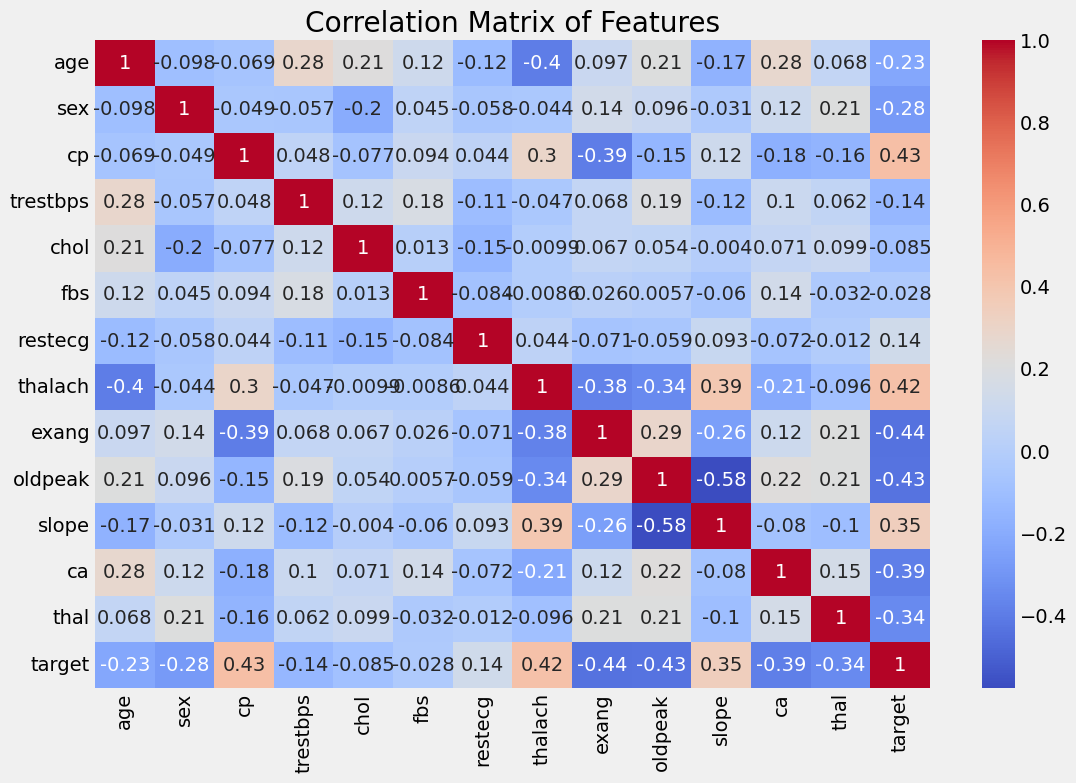

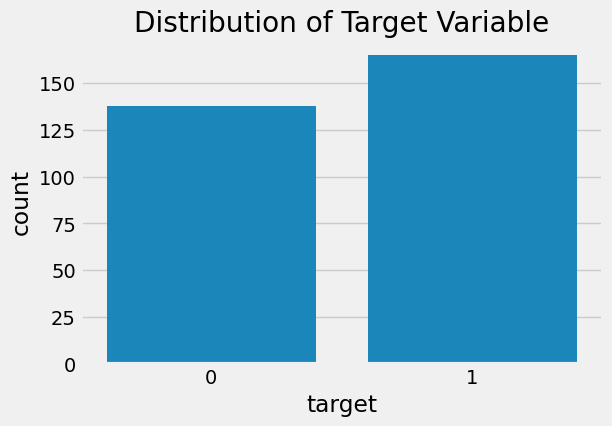

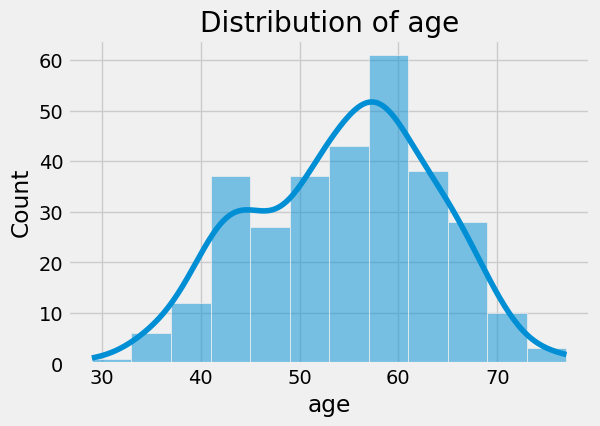

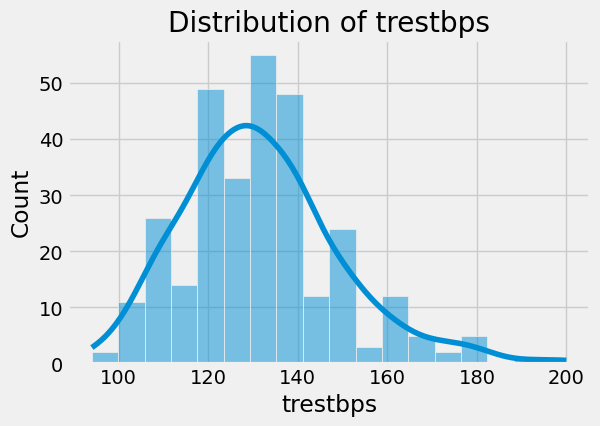

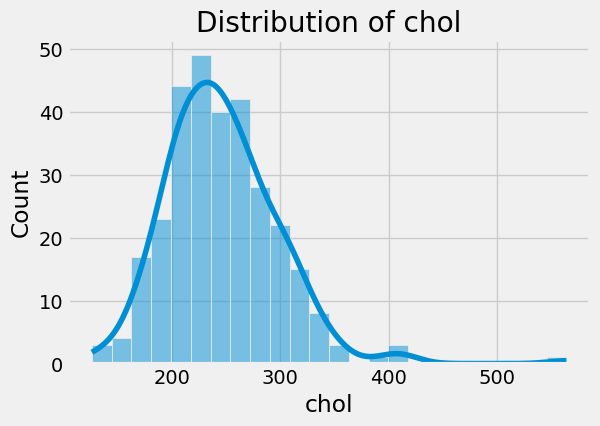

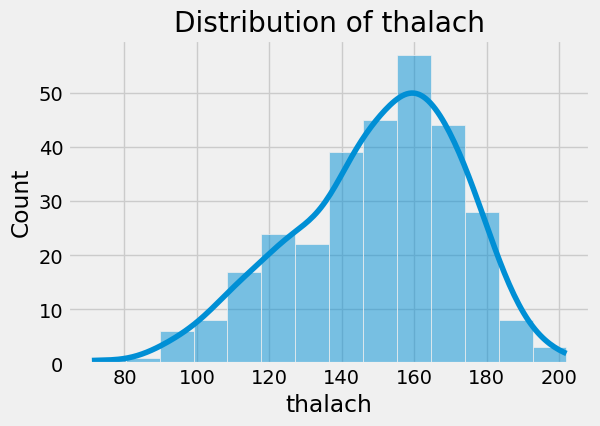

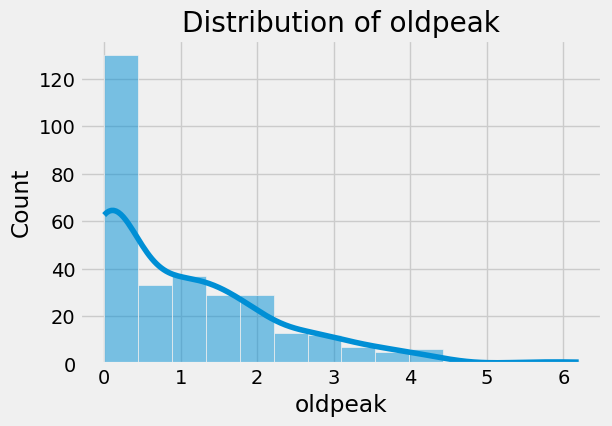

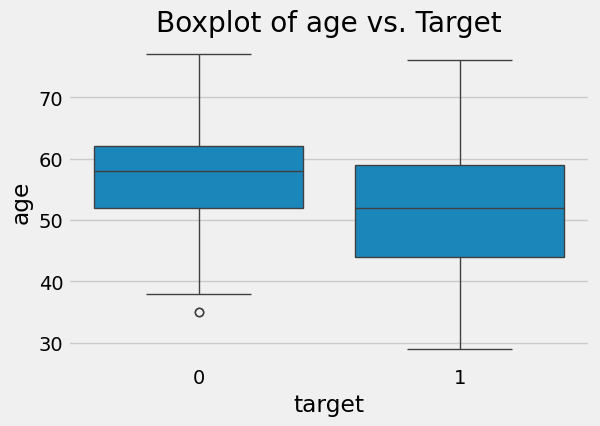

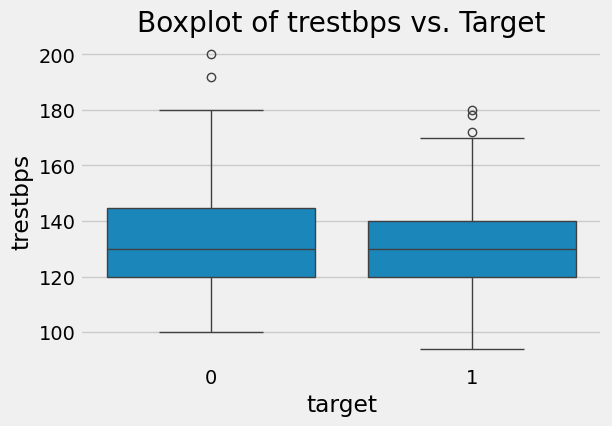

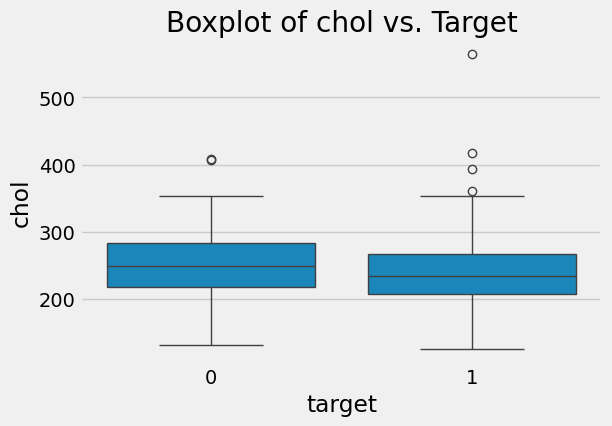

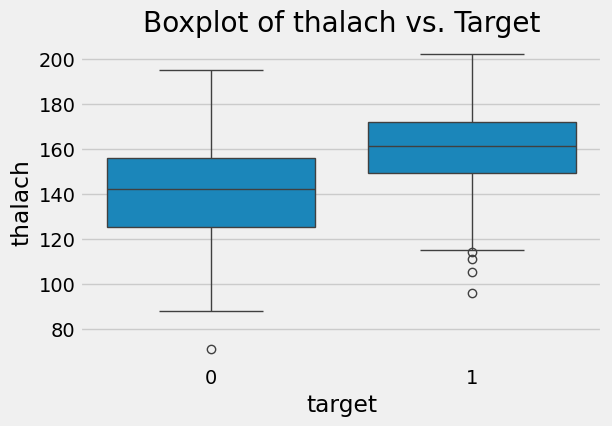

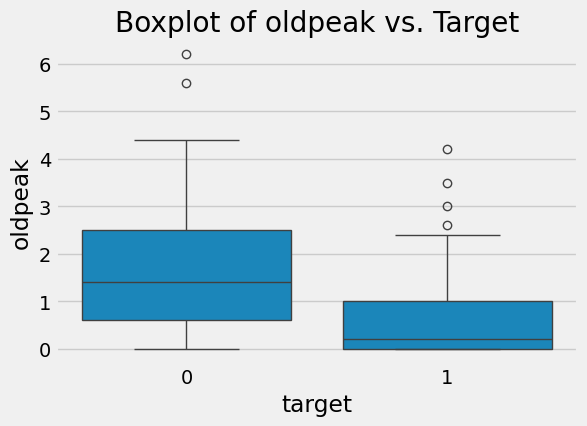

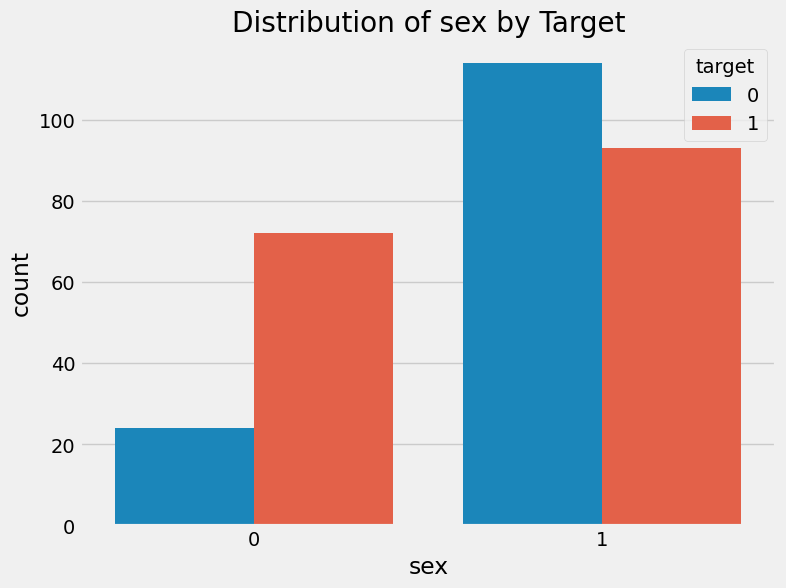

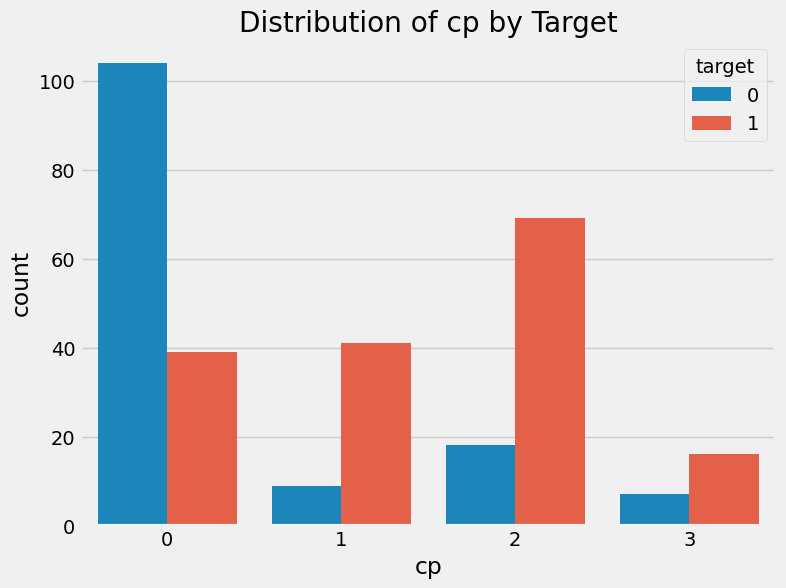

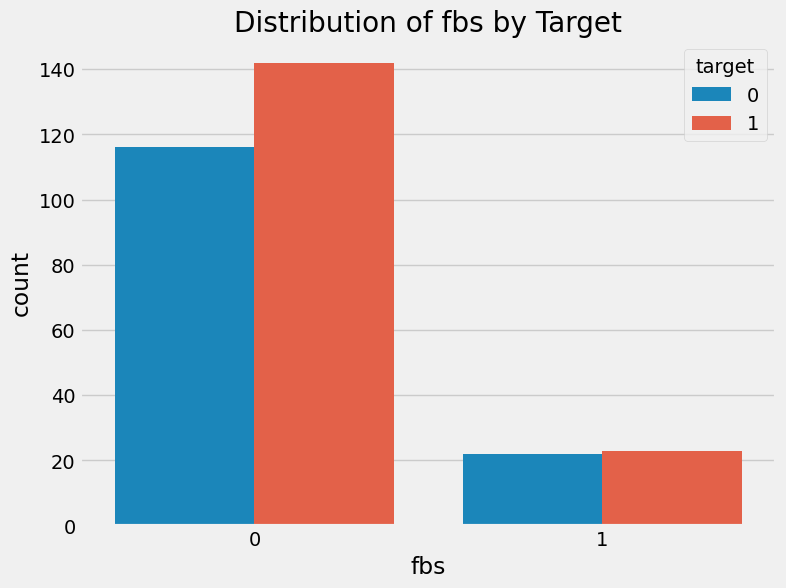

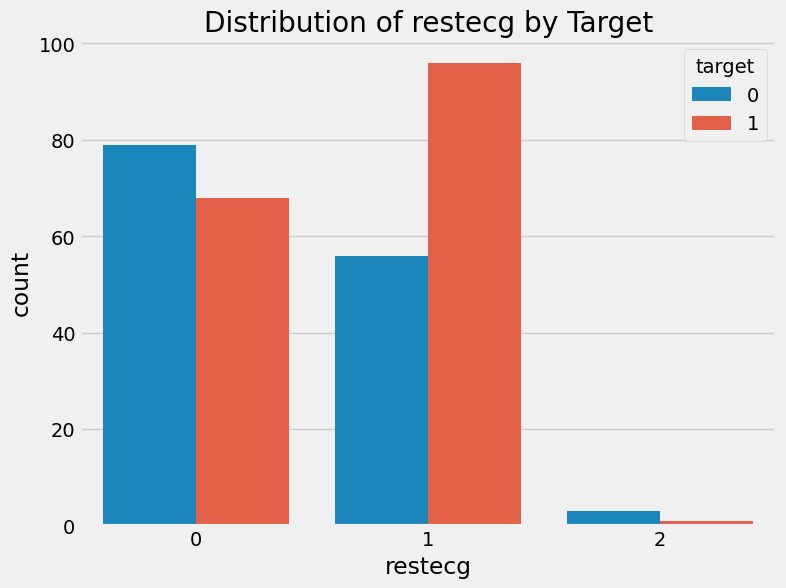

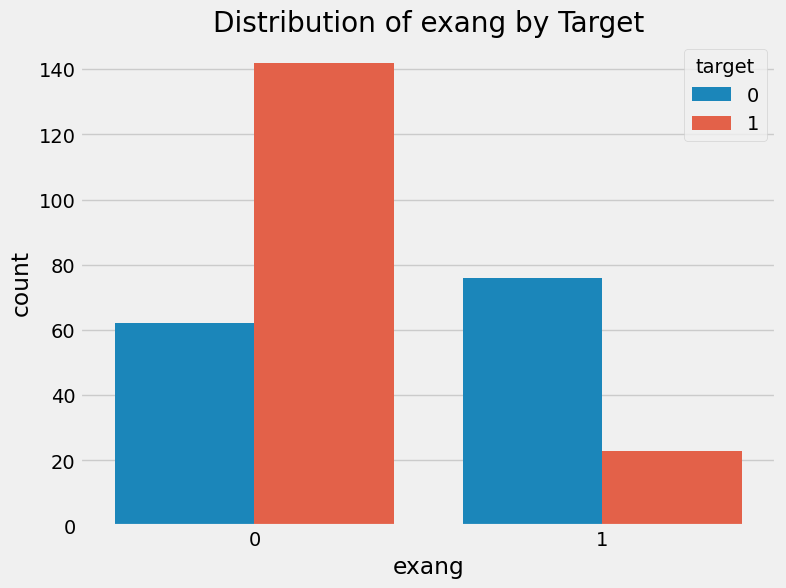

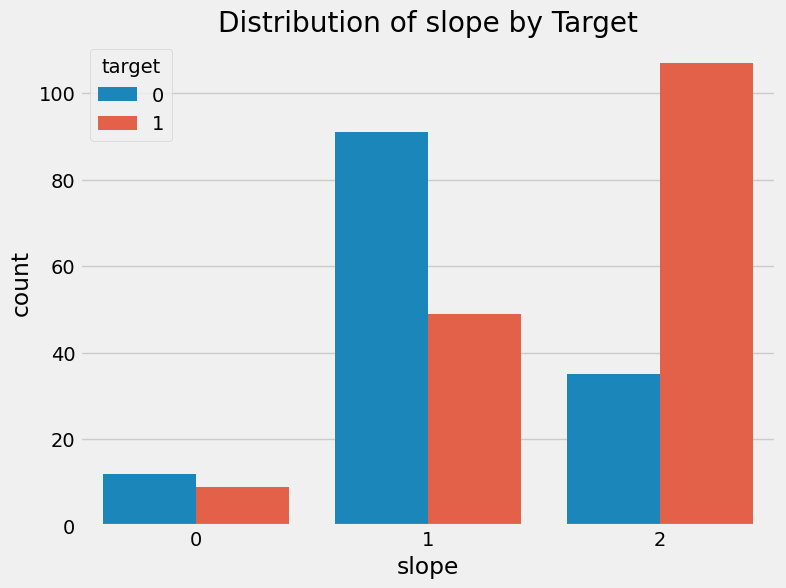

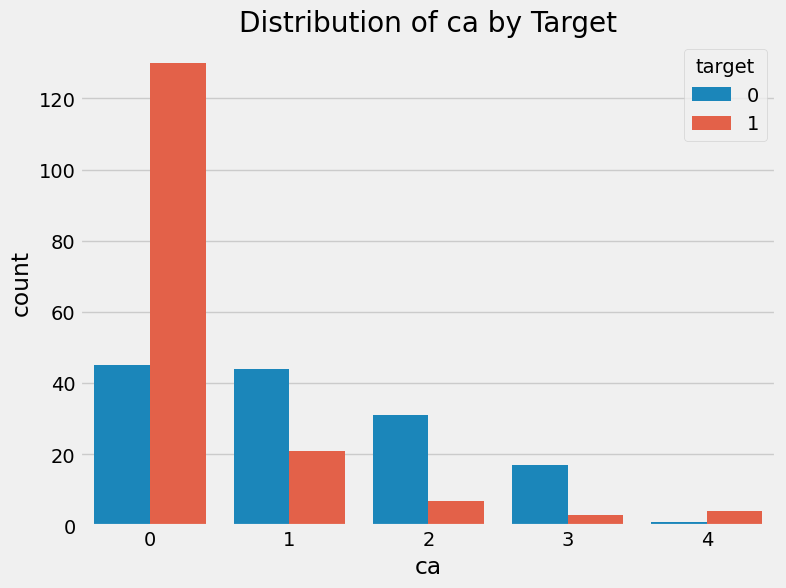

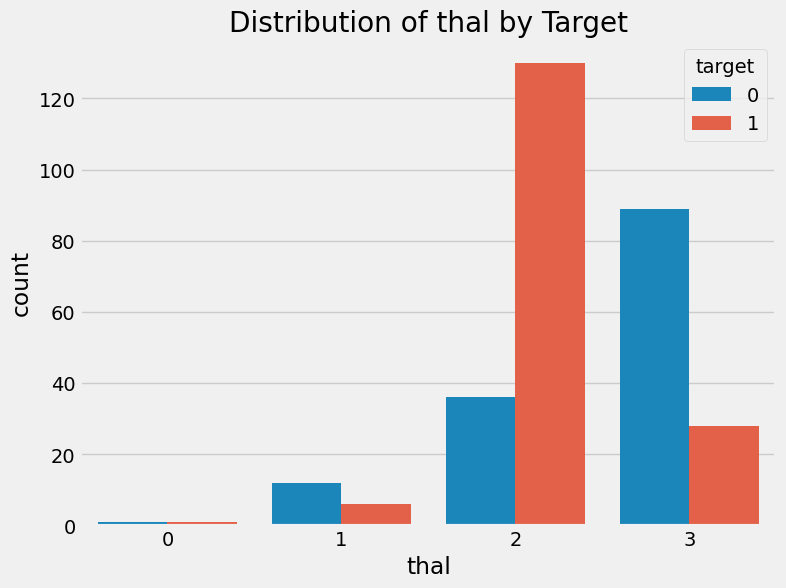

In [37]:
# prompt: you got the dataframe df and the column names as well, build me a nice EDA

import matplotlib.pyplot as plt
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# Histograms of Numerical Features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Boxplots of Numerical Features
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'Boxplot of {feature} vs. Target')
    plt.show()

# Countplots of Categorical Features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='target', data=df)
    plt.title(f'Distribution of {feature} by Target')
    plt.show()


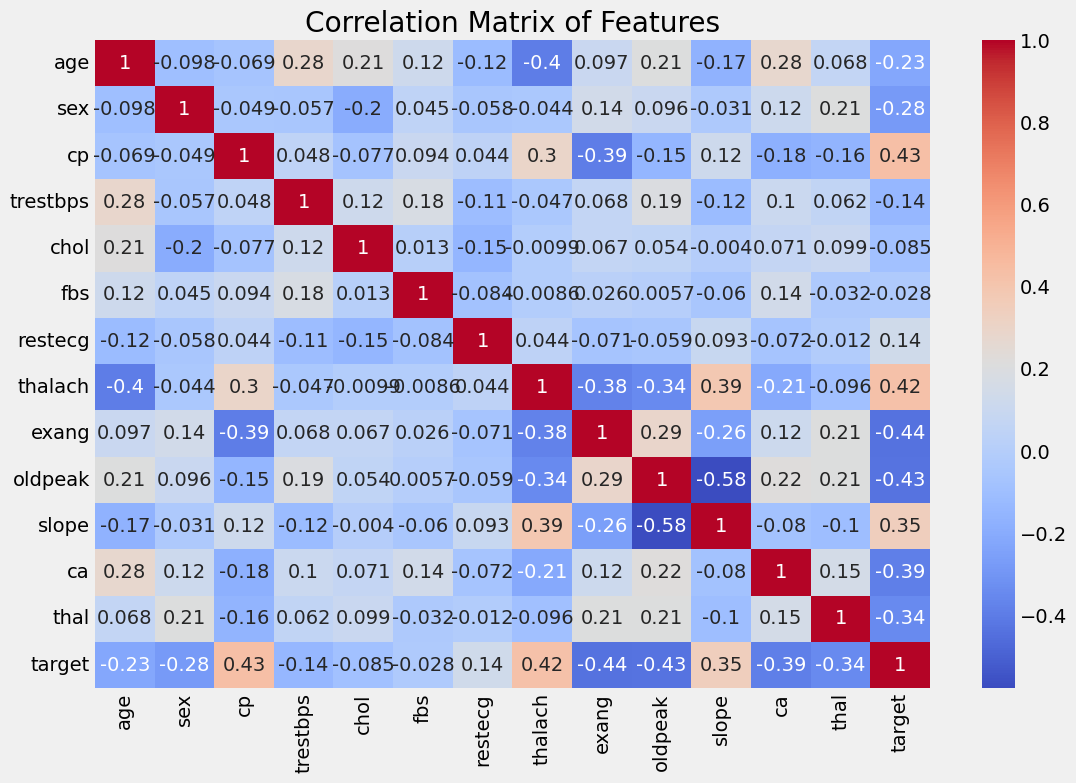

In [38]:
import matplotlib.pyplot as plt
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Analysis

 1.  Strong Correlation between 'cp' (chest pain type) and 'target' (heart
    disease):
    If the correlation coefficient between 'cp' and 'target' is high (close to 1 or -1), it suggests that different chest pain types are strongly associated with the presence or absence of heart disease. This could be a significant predictor in a predictive model.

 2. Moderate Correlation between 'thalach' (maximum heart rate) and 'target':
     A moderate correlation (e.g., 0.4 to 0.7 or -0.4 to -0.7) between 'thalach' and 'target' indicates that maximum heart rate is related to heart disease.  Higher or lower maximum heart rates might be indicative of heart health status.  The direction of the correlation (positive or negative) will specify whether higher or lower rates are associated with a higher risk of heart disease.

 3.  Moderate to Weak Correlation between 'age' and 'target':
    If age shows a moderate to weak correlation with 'target', it suggests a possible link between age and the likelihood of heart disease.  However, it might not be a strong predictor compared to other variables.


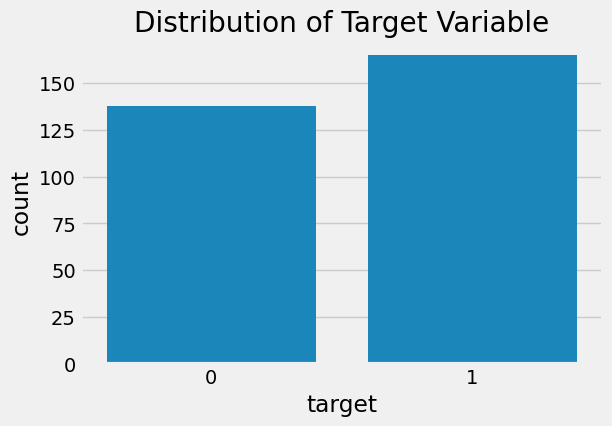

In [39]:
# Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

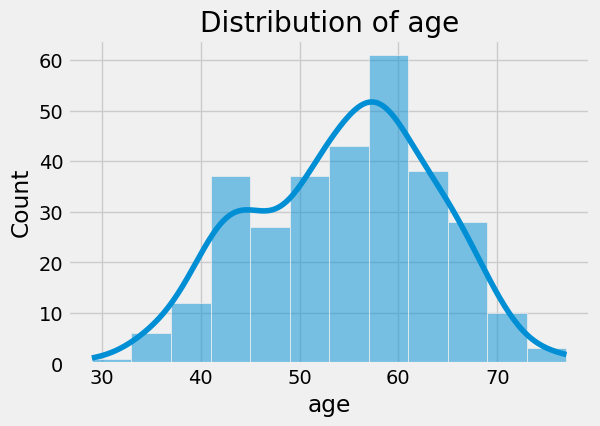

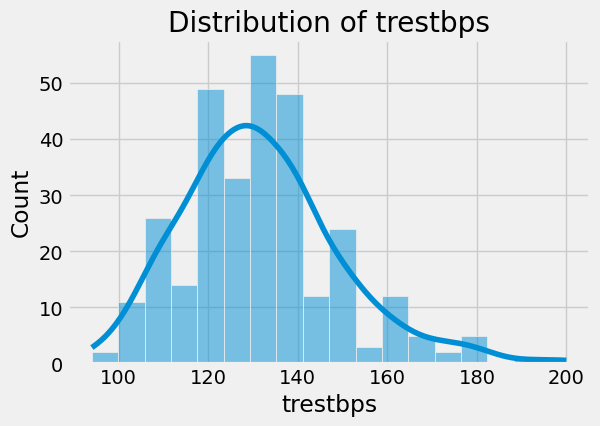

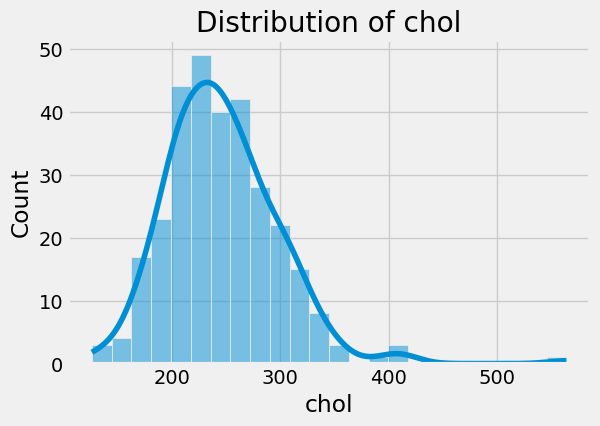

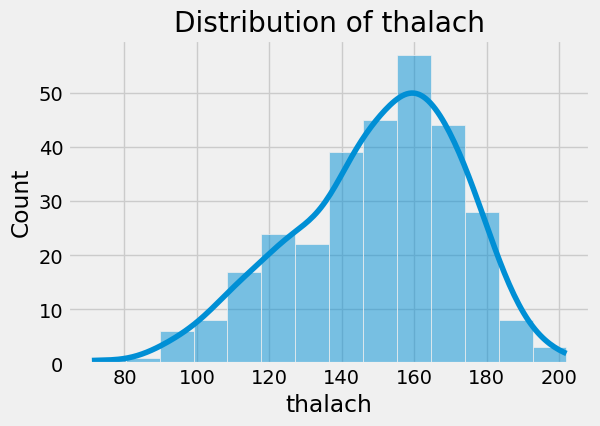

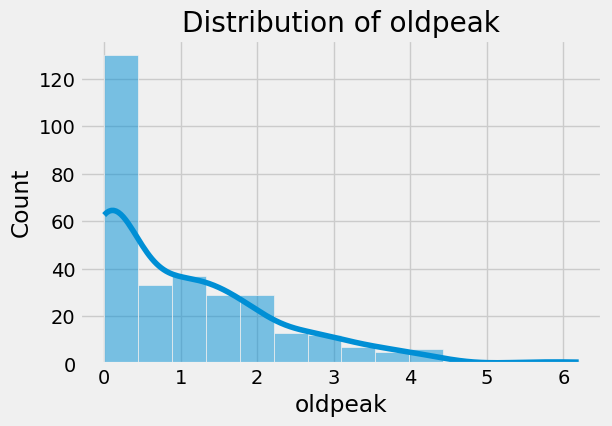

In [40]:
# Histograms of Numerical Features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


# Key Observations from Histograms of Numerical Features:

 1. Age: The distribution of age appears to be slightly right-skewed, with a peak around 50-60 years. This suggests that the dataset might have a higher representation of middle-aged individuals.  Further analysis could involve checking for outliers or exploring age cohorts for potential patterns.

 2. trestbps (Resting Blood Pressure): The distribution seems roughly normal, although with some potential outliers towards higher blood pressure values.  Further investigation into the clinical significance of these outliers would be valuable.

 3. chol (Cholesterol): The distribution of cholesterol levels is slightly right-skewed, with a peak somewhere in the mid-range of values.  It shows a significant right tail, which suggests that there are individuals with relatively high cholesterol levels.  Outlier detection and analysis might be relevant.

 4. thalach (Maximum Heart Rate): The distribution of maximum heart rate is somewhat negatively skewed (left skew), with a peak towards higher heart rates.  Investigate if this reflects typical heart rate distributions in the population or suggests a bias in the sample.

 5. oldpeak (ST Depression): The distribution of ST depression is highly skewed towards the lower end of the range, with a long tail towards higher values.  There might be a small subset of individuals exhibiting significant ST depression, which could warrant closer examination.  The presence of outliers needs to be verified.


In [65]:
X = df.drop('target', axis=1)
y = df['target']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [76]:
from sklearn.ensemble import AdaBoostClassifier

In [77]:
model = AdaBoostClassifier()

In [78]:
model.fit(X_train, y_train)

AdaBoostClassifier()

In [79]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [80]:
model.score(X_test, y_test)

0.8688524590163934

In [81]:
y_pred = model.predict(X_test)

In [82]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



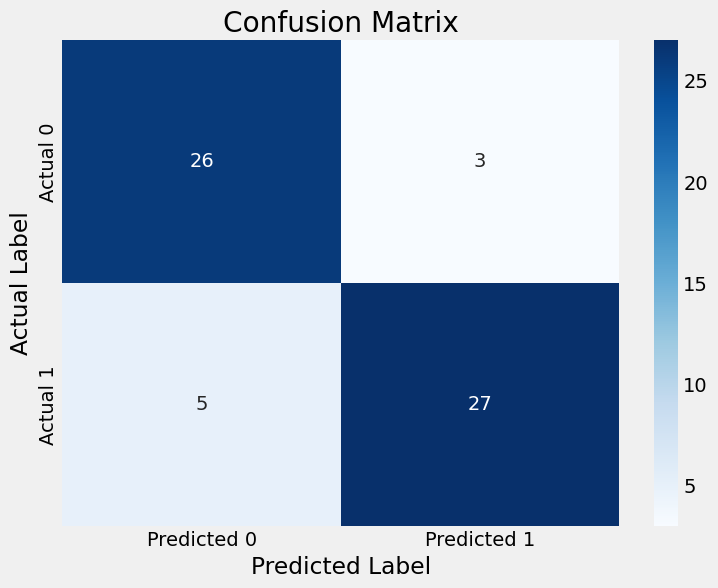

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()